# Data Cleaning and Preprocessing

## Import the Packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Load the Data

In [4]:
link = 'https://github.com/sabirinID/Accenture-Strategy-Consulting-Virtual-Internship/raw/main/Files/5-Analyse%20Data%20from%20Project%20Launch/Task%205%20-%20Forage%20Accenture%20BNPL%20Dataset.xlsx'

df = pd.read_excel(link, header=0)

In [5]:
df.head(3)

,order_ref,user_id,user_age,transaction_amount,payment_method
0,1132281533,I0rmuuMuhEvJNM57,34,184.34,card
1,3969891453,qS2JZuEAEDsOP2Gx,50,342.49,bnpl
2,4151458626,RpV4Uu1dEszTCOEM,47,146.51,bnpl


In [6]:
df.tail(3)

,order_ref,user_id,user_age,transaction_amount,payment_method
296,4547464795,ccsFZwawm475aTiw,24,210.43,paypal
297,6752905764,9V5cb1KKRXigAt2E,25,137.26,paypal
298,3989227284,kDK4Vp6KTf1LUV5d,49,185.29,paypal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_ref           299 non-null    int64  
 1   user_id             299 non-null    object 
 2   user_age            299 non-null    int64  
 3   transaction_amount  299 non-null    float64
 4   payment_method      299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


---
## Clean and Preprocess the Data

### Check the data for missing values, outliers, or errors

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='all')

,order_ref,user_id,user_age,transaction_amount,payment_method
count,2.990000e+02,299,299.000000,299.000000,299
unique,NaN,299,NaN,NaN,3
top,NaN,I0rmuuMuhEvJNM57,NaN,NaN,bnpl
freq,NaN,1,NaN,NaN,119
mean,5.640905e+09,NaN,32.334448,214.076990,NaN
std,2.645584e+09,NaN,10.075646,76.846945,NaN
min,1.012455e+09,NaN,18.000000,83.210000,NaN
25%,3.395445e+09,NaN,23.000000,146.510000,NaN
50%,5.775407e+09,NaN,33.000000,218.110000,NaN
75%,7.951907e+09,NaN,41.000000,275.840000,NaN


---
## Analyze the Data

### Part 1: Creating Pivot Tables

In [11]:
# Divide the age into groups with an interval of 5, starting from 18 and ending at 52
bins = range(18, 54, 5)
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52']

# Create age groups
df['age_group'] = pd.cut(df['user_age'],
                         bins=bins,
                         labels=labels,
                         include_lowest=True)

df.head(3)

,order_ref,user_id,user_age,transaction_amount,payment_method,age_group
0,1132281533,I0rmuuMuhEvJNM57,34,184.34,card,33-37
1,3969891453,qS2JZuEAEDsOP2Gx,50,342.49,bnpl,48-52
2,4151458626,RpV4Uu1dEszTCOEM,47,146.51,bnpl,43-47


We will calculate the total transaction amount for each `age_group` and `payment_method`.

In [12]:
# Create a pivot table with the sum of 'transaction_amount' for each 'age_group' and 'payment_method'
pivot_total_transaction_amount = pd.pivot_table(
    df,
    values='transaction_amount',
    index='age_group',
    columns='payment_method',
    aggfunc=np.sum
    )

pivot_total_transaction_amount

payment_method,bnpl,card,paypal
age_group,,,
18-22,12197.83,5181.06,817.56
23-27,6863.20,2683.99,581.91
28-32,434.27,3214.07,1941.47
33-37,2783.46,4831.88,3342.04
38-42,1003.37,2181.48,4730.42
43-47,869.83,2539.43,4361.05
48-52,958.28,1168.71,1323.71


We will count the number of transactions for each `payment_method` in each `age_group`.

In [13]:
# Create a pivot table with the count of 'order_ref' for each 'age_group' and 'payment_method'
pivot_total_order_ref = pd.pivot_table(
    df,
    values='order_ref',
    index='age_group',
    columns='payment_method',
    aggfunc='count'
)

pivot_total_order_ref

payment_method,bnpl,card,paypal
age_group,,,
18-22,56,24,5
23-27,29,11,3
28-32,3,13,10
33-37,15,21,17
38-42,6,10,21
43-47,6,11,22
48-52,4,6,6


We will calculate the percentage of BNPL transactions for each `age_group`.

In [14]:
# Calculate the percentage of each 'payment_method' within each 'age_group'
pivot_total_transaction = pivot_total_order_ref.apply(lambda x: x / x.sum() * 100, axis=1)

# Add a 'Grand Total' column to the pivot table
pivot_total_transaction['Grand Total'] = pivot_total_transaction.sum(axis=1)

# Format the values to show percentages with two decimal places
# pivot_total_transaction = pivot_total_order_ref.applymap('{:.2f}%'.format)

pivot_total_transaction

payment_method,bnpl,card,paypal,Grand Total
age_group,,,,
18-22,65.882353,28.235294,5.882353,100.0
23-27,67.441860,25.581395,6.976744,100.0
28-32,11.538462,50.000000,38.461538,100.0
33-37,28.301887,39.622642,32.075472,100.0
38-42,16.216216,27.027027,56.756757,100.0
43-47,15.384615,28.205128,56.410256,100.0
48-52,25.000000,37.500000,37.500000,100.0


In [15]:
# Create a pivot table with the sum of 'transaction_amount' and average of 'user_age' for each 'payment_method'
pivot_total_transaction_percentage = pd.pivot_table(
    df,
    values=['transaction_amount', 'user_age'],
    index='payment_method',
    aggfunc={'transaction_amount': np.sum, 'user_age': np.mean}
)

pivot_total_transaction_percentage

,transaction_amount,user_age
payment_method,,
bnpl,25110.24,27.243697
card,21800.62,32.781250
paypal,17098.16,39.035714


In [16]:
# Calculate the percentage of total 'transaction_amount'
total_transaction_amount = pivot_total_transaction_percentage['transaction_amount'].sum()
pivot_total_transaction_percentage['SUM of transaction_amount'] = (pivot_total_transaction_percentage['transaction_amount'] / total_transaction_amount) * 100

# Drop the original 'transaction_amount' column
pivot_total_transaction_percentage.drop(
    'transaction_amount',
    axis=1,
    inplace=True
)

# Rename the 'user_age' column to 'AVERAGE of user_age'
pivot_total_transaction_percentage.rename(
    columns={'user_age': 'AVERAGE of user_age'},
    inplace=True
)

# Add a 'Grand Total' row to the pivot table
# Calculate the 'Grand Total' for 'SUM of transaction_amount' as the sum of all values
pivot_total_transaction_percentage.loc['Grand Total', 'SUM of transaction_amount'] = pivot_total_transaction_percentage['SUM of transaction_amount'].sum()

# Calculate the 'Grand Total' for 'AVERAGE of user_age' as the mean of all values
pivot_total_transaction_percentage.loc['Grand Total', 'AVERAGE of user_age'] = pivot_total_transaction_percentage['AVERAGE of user_age'].mean()

pivot_total_transaction_percentage = pivot_total_transaction_percentage[['SUM of transaction_amount', 'AVERAGE of user_age']]
pivot_total_transaction_percentage

,SUM of transaction_amount,AVERAGE of user_age
payment_method,,
bnpl,39.229221,27.243697
card,34.058669,32.781250
paypal,26.712110,39.035714
Grand Total,100.000000,33.020221


---
## Visualize the Results

### Part 2: Creating Bar Chart

Show the share of BNPL transactions as a percentage of total transactions for each age group.

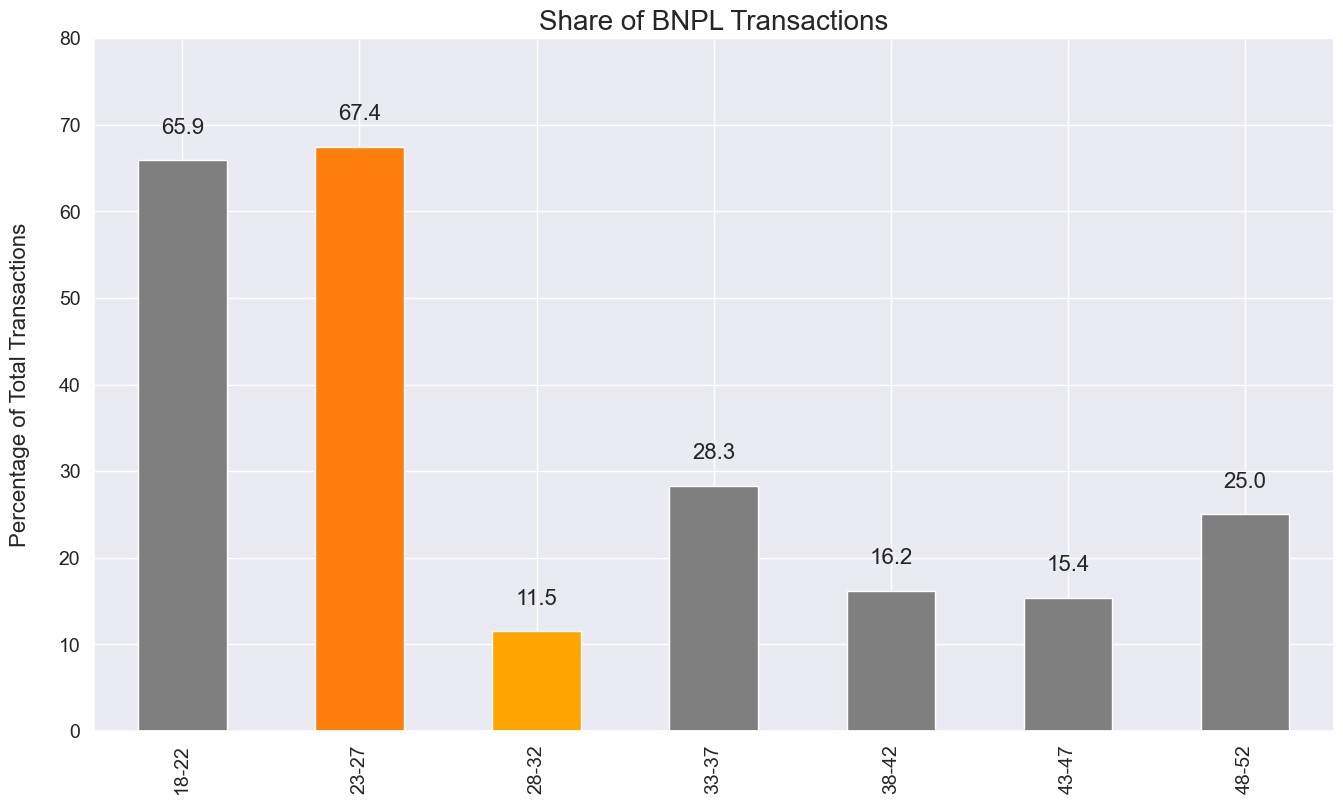

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))

# Get the data for colors
bnpl_percentage = pivot_total_transaction['bnpl']
colors = ['tab:orange' if val == bnpl_percentage.max() else
          'orange' if val == bnpl_percentage.min() else
          'tab:gray' for val in bnpl_percentage]

bars = pivot_total_transaction['bnpl'].plot(kind='bar', ax=ax, color=colors)
ax.set_title('Share of BNPL Transactions', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Total Transactions\n', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# Add annotations for each bar
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2.5),
                ha='center', va='center',
                size=16, xytext=(0, 8),
                textcoords='offset points')

ax.set_ylim(0, 80)

plt.show()

#### Insights

- Younger age groups (18-27) show a strong preference for 'Buy Now, Pay Later' (BNPL) method.
- BNPL is the most popular payment method among younger age groups, accounting for 65.9% of transactions for the 18-22 age group and 67.4% for the 23-27 age group.
- Meanwhile, the usage of BNPL drops significantly as the age group increases, with only 11.5% usage in the 28-32 age group, further reducing to 25% in the 48-52 age group.

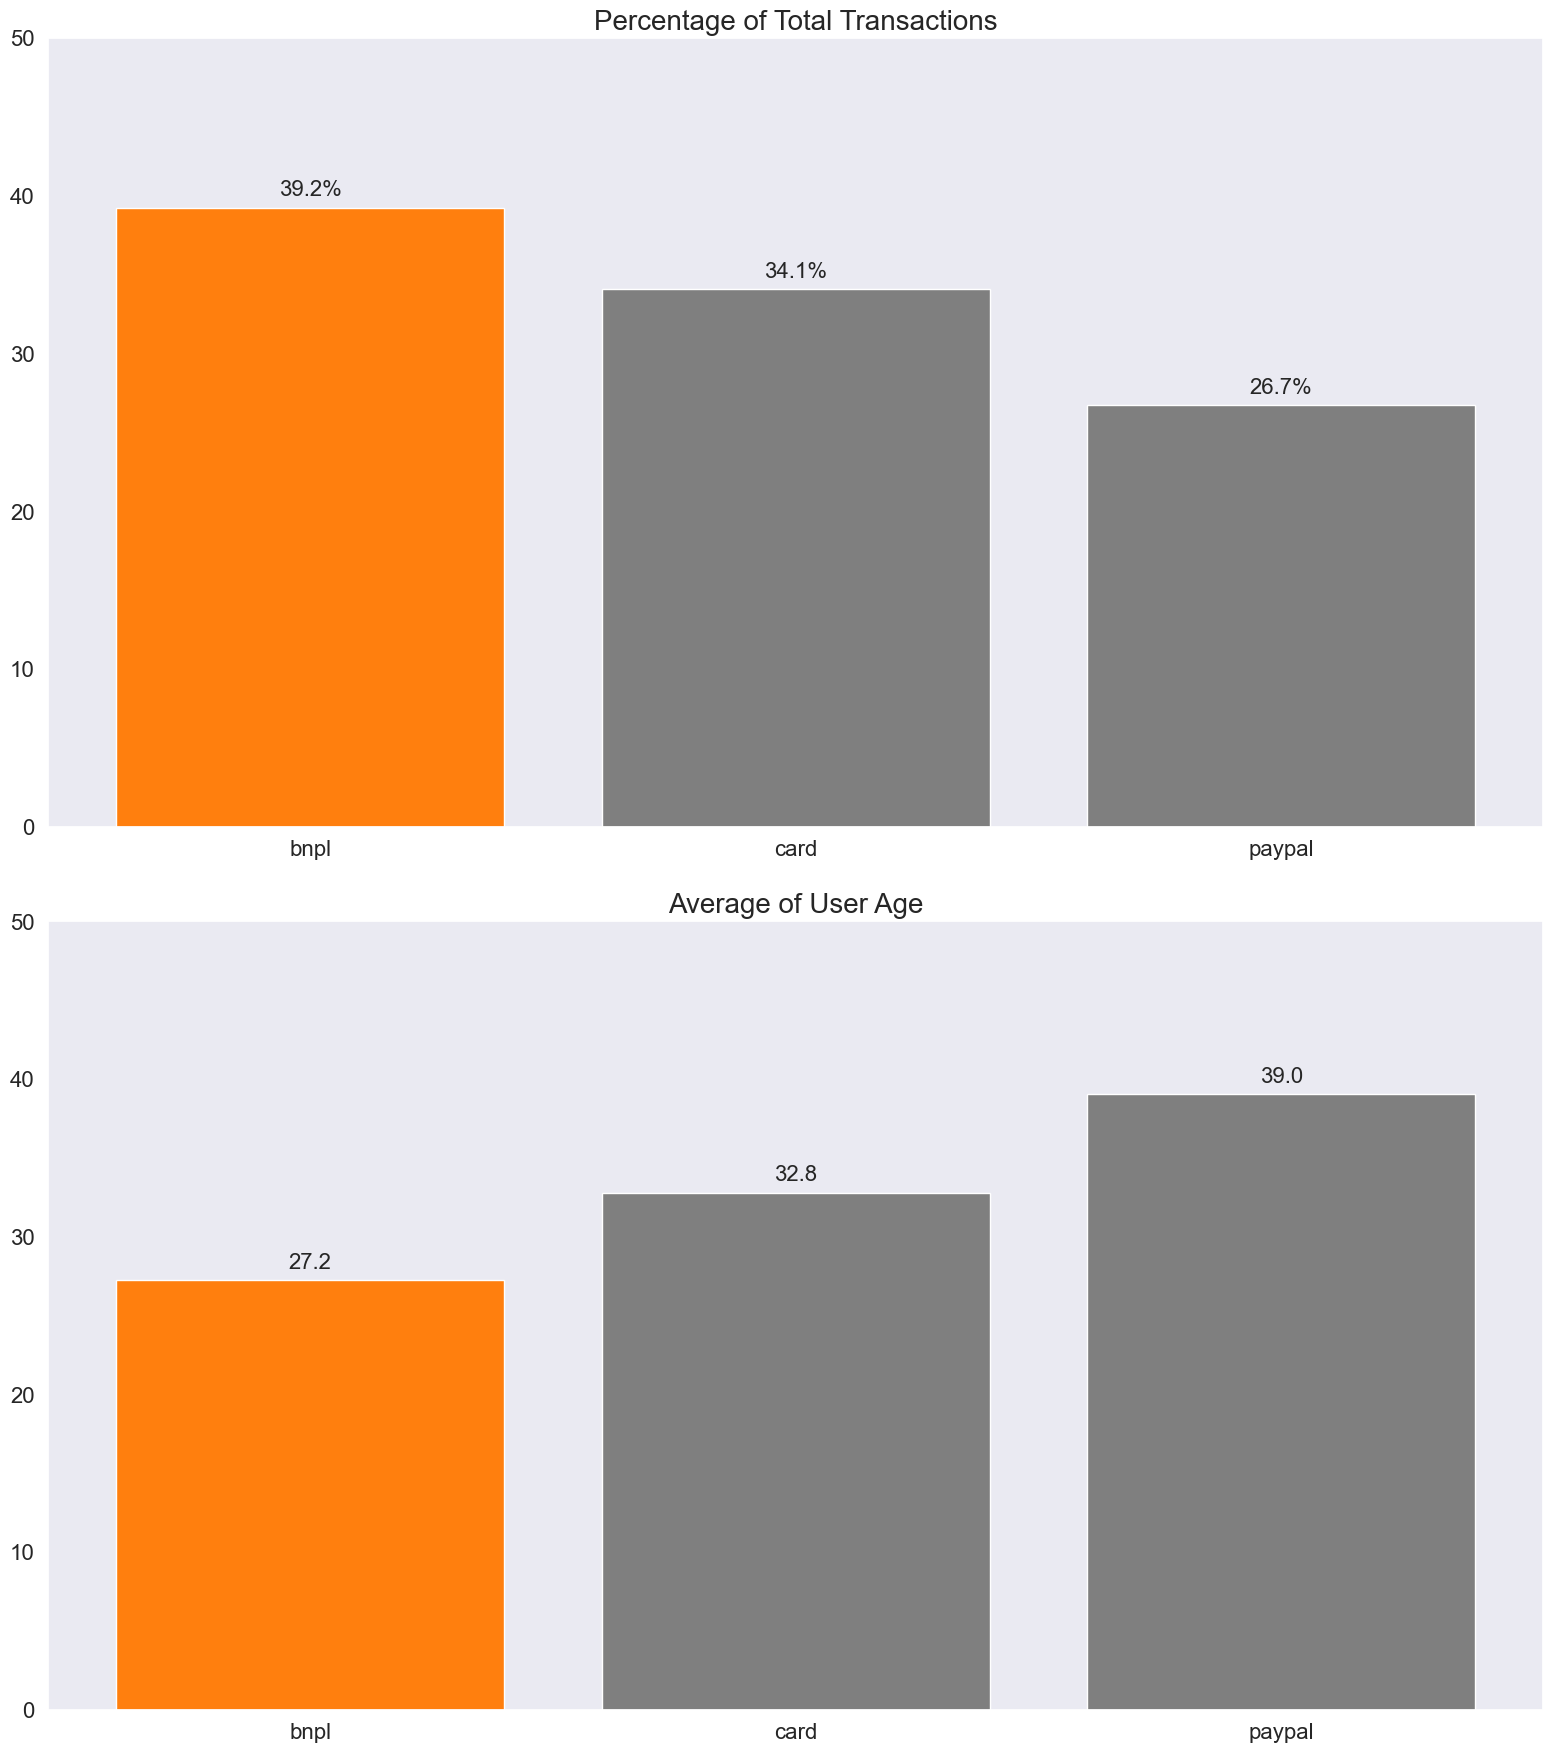

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))

# Get the index values
index_values = pivot_total_transaction_percentage[:-1].index

# Plot 'SUM of transaction_amount' data
for i, value in enumerate(pivot_total_transaction_percentage[:-1]['SUM of transaction_amount']):
    color = 'tab:orange' if pivot_total_transaction_percentage.index[i] == 'bnpl' else 'tab:gray'
    ax1.bar(i, value, color=color)
    ax1.annotate(f'{value:.1f}%', xy=(i, value + 0.5), ha='center', va='bottom', size=16)

ax1.set_title('Percentage of Total Transactions', fontsize=20)
ax1.set_xticks(range(len(index_values)))
ax1.set_xticklabels(index_values)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_ylim(0, 50)
ax1.tick_params(axis='both', labelsize=16)
ax1.grid(False)

# Plot 'AVERAGE of user_age' data
for i, value in enumerate(pivot_total_transaction_percentage[:-1]['AVERAGE of user_age']):
    color = 'tab:orange' if pivot_total_transaction_percentage.index[i] == 'bnpl' else 'tab:gray'
    ax2.bar(i, value, color=color)
    ax2.annotate(f'{value:.1f}', xy=(i, value + 0.5), ha='center', va='bottom', size=16)

ax2.set_title('Average of User Age', fontsize=20)
ax2.set_xticks(range(len(index_values)))
ax2.set_xticklabels(index_values)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_ylim(0, 50)
ax2.tick_params(axis='both', labelsize=16)
ax2.grid(False)

plt.tight_layout(pad=2)
plt.show()

In [19]:
def plot_data(column, title, unit):
    plt.figure(figsize=(16, 9))

    data = pivot_total_transaction_percentage[:-1]
    index_values = data.index

    for i, value in enumerate(data[column]):
        color = 'tab:orange' if index_values[i] == 'bnpl' else 'tab:gray'
        plt.bar(i, value, color=color)
        plt.annotate(f'{value:.1f}{unit}', xy=(i, value + .5), ha='center', va='bottom', size=16)

    plt.title(title, fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.ylim(0, 50)
    plt.tick_params(axis='both', labelsize=16)
    plt.xticks(range(len(index_values)), index_values)
    plt.grid(False)
    plt.show()

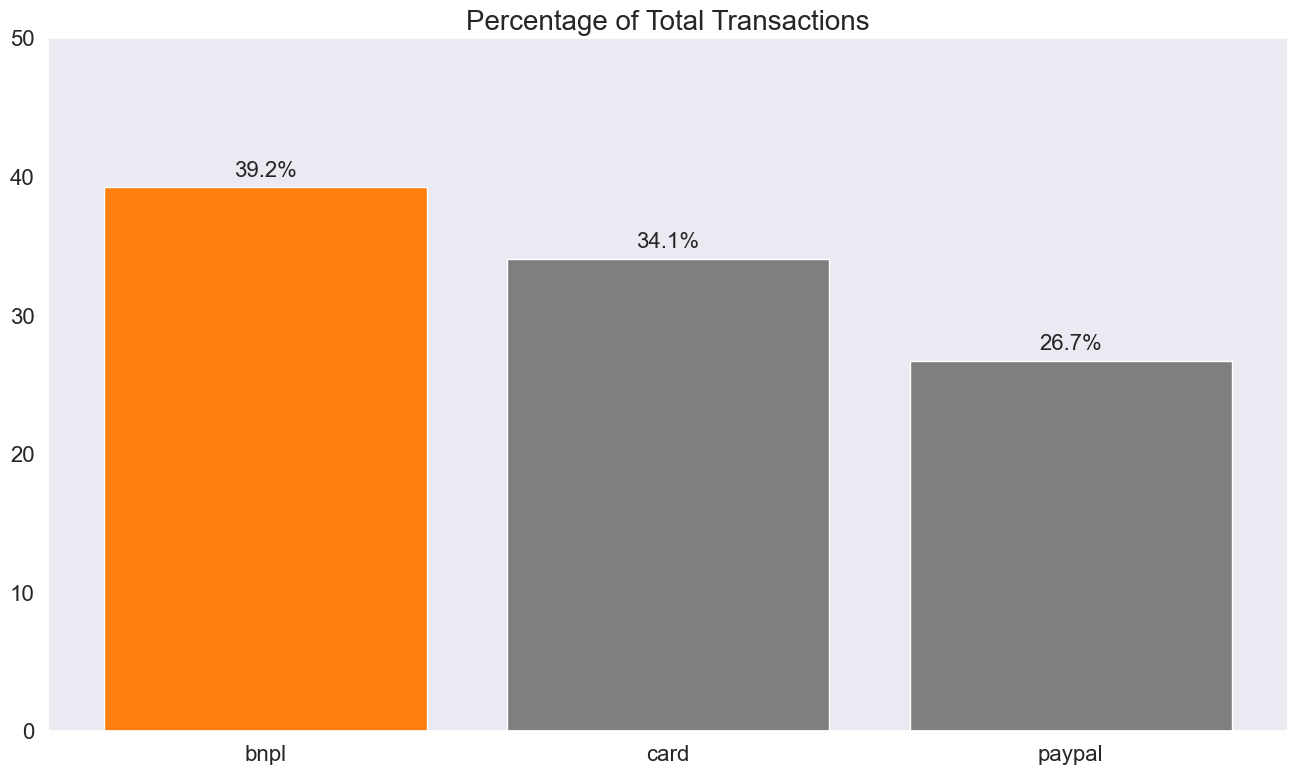

In [20]:
plot_data('SUM of transaction_amount', 'Percentage of Total Transactions', '%')

#### Insights

- In terms of total transaction volume, BNPL accounts for 39.2% of total transactions, followed by Card at 34.1% and Paypal at 26.7%
- This indicates that while BNPL is popular among younger users, traditional payment methods like Card and Paypal still hold a significant share of total transactions.
- This could be due to various factors such as financial stability, credit availability, technological savviness, and trust in different payment platforms.


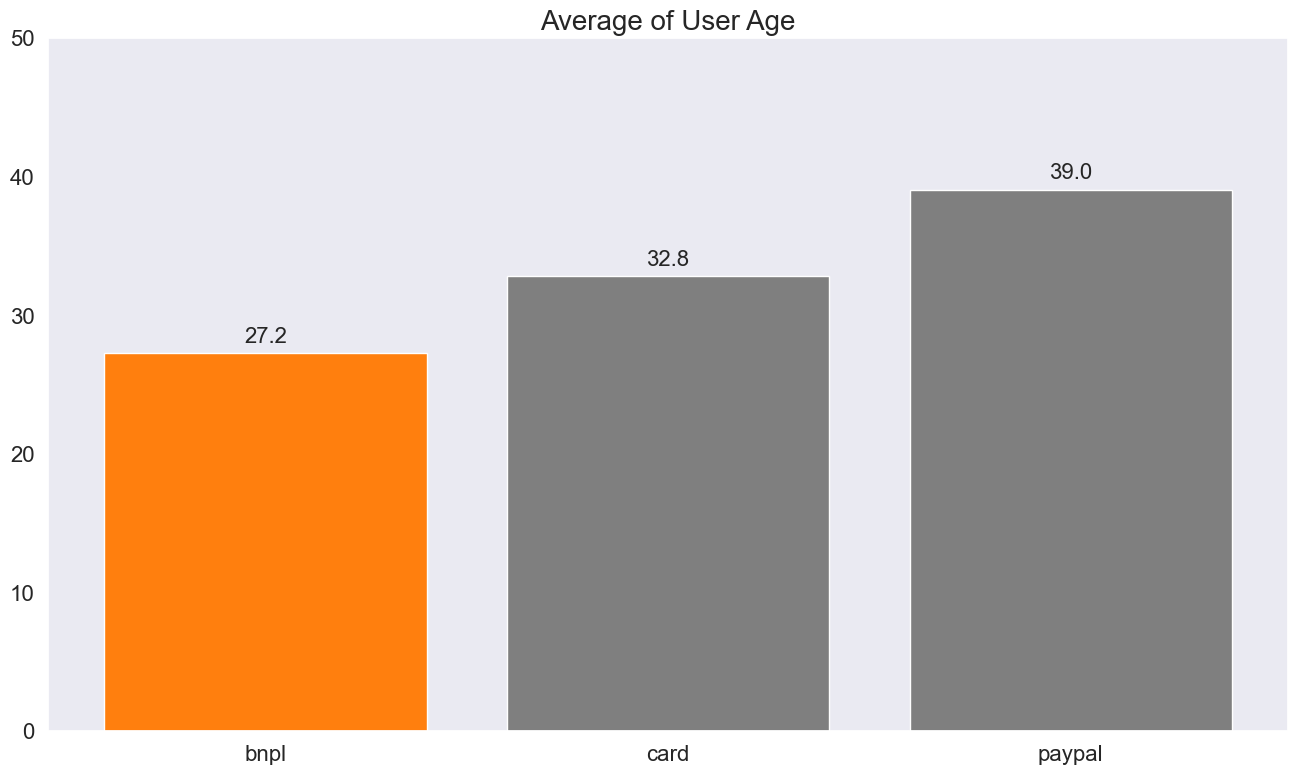

In [21]:
plot_data('AVERAGE of user_age', 'Average of User Age', '')

#### Insights

- BNPL users have an average age of 27.2 years, followed by Card at 32.8 years and Paypal at 39.0 years
- This further supports the conclusion that younger users prefer BNPL, while older users tend to use Card and Paypal methods.
- On the other hand, older users continue to prefer traditional payment methods like Card and Paypal.
- This suggests a shift in payment method preference as customers age, which could be a critical insight for companies in tailoring their payment options and marketing strategies.